# Пример понижения размерности с помощью PCA

In [1]:
import numpy as np

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

In [4]:
!head ./data/digit/train.csv

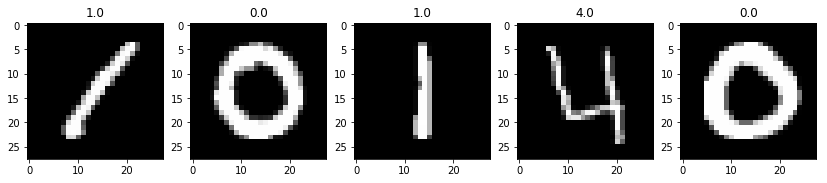

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [74]:
# выбираем семпл данных для обработки
choices = np.random.choice(train_img.shape[0], 10000)

y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [75]:
# центрируем данные
X_mean = X.mean(axis=0)
# X -= X_mean
X_std = X.std(axis=0)

X = (X - X_mean) / (X_std + 1e-32)

(array([5604.,  382.,  302.,  285.,  262.,  238.,  246.,  321.,  329.,
        2031.]),
 array([-0.77975523, -0.53455675, -0.28935823, -0.04415973,  0.20103876,
         0.44623727,  0.69143575,  0.93663424,  1.1818328 ,  1.4270313 ,
         1.6722298 ], dtype=float32),
 <a list of 10 Patch objects>)

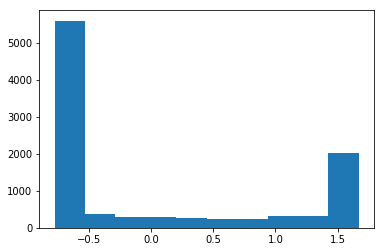

In [99]:
plt.hist(X[:, 320])

In [76]:
# матрица ковариации признаков
cov = np.dot(X.T, X) / X.shape[0]

In [77]:
U, S, _ = np.linalg.svd(cov)
# U - собсвенные вектора матрицы ковариации
# S - собственные значения

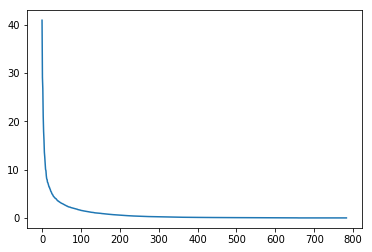

In [78]:
plt.plot(S)

In [79]:
from sklearn import decomposition

In [80]:
svd = decomposition.TruncatedSVD(n_components=32, n_iter=7, random_state=42)

In [81]:
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=32, n_iter=7,
       random_state=42, tol=0.0)

In [82]:
svd.singular_values_

array([639.60406, 539.21014, 516.8758 , 458.48166, 423.38098, 401.22568,
       368.4656 , 354.72903, 334.18958, 317.29202, 312.60013, 295.06247,
       284.05573, 282.038  , 271.7803 , 269.7167 , 263.9277 , 259.03265,
       253.23831, 252.35622, 245.74026, 243.75526, 237.30482, 233.37643,
       231.0757 , 225.43027, 221.69089, 220.27556, 215.9097 , 211.75417,
       209.78458, 207.66113], dtype=float32)

In [83]:
svd.explained_variance_ratio_.sum()

0.49757686

In [84]:
S[:10]

array([40.90935 , 29.07475 , 26.716057, 21.020544, 17.925137, 16.098207,
       13.576677, 12.58327 , 11.168251, 10.067432], dtype=float32)

## Собственные числа

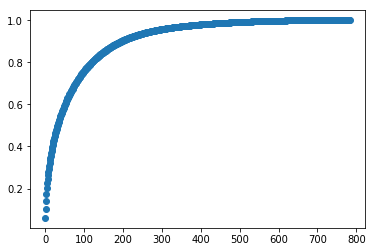

In [85]:
# накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [86]:
for i in range(5):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.061
[001] 0.104
[002] 0.143
[003] 0.174
[004] 0.201


## Понижаем размерность

In [87]:
S_thr = 0.75  # задаем порог для накопленной суммы собственных значений

# определяем необходимое число компонент для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=96 S=0.750


In [63]:
# получаем сжатое представление объектов
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [64]:
Xrot_reduced.shape

(10000, 96)

## Восстанавливаем изображение после понижения размерности

In [65]:
Xrot_restored = np.dot(Xrot_reduced, U[:,:n_comp].T)

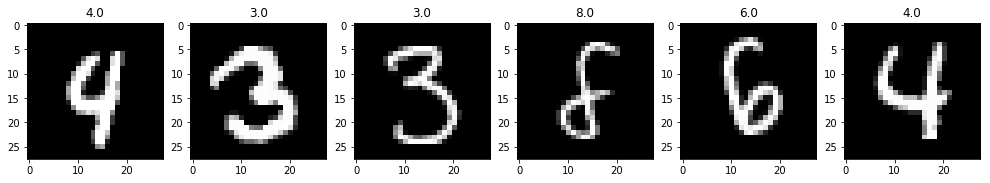

In [89]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img * X_std + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)), cmap='gray');

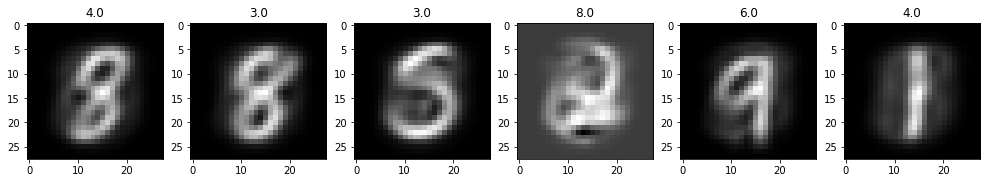

In [92]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img * X_mean + X_mean
    plt.title('%s' % y[i-1])
    plt.imshow(img_.reshape((28,28)) + X_mean.reshape((28,28)), cmap='gray');

## Визуализация собственных векторов

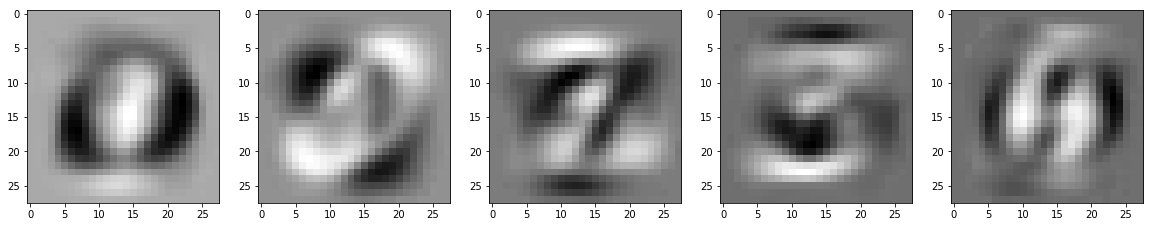

In [93]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(U.T[:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img.reshape((28,28)), cmap='gray');

In [46]:
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


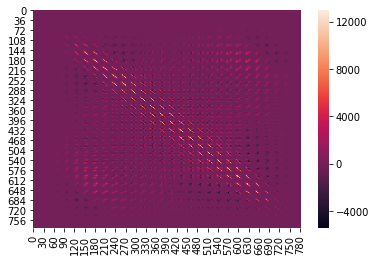

In [47]:
sns.heatmap(cov, cmap=)

In [94]:
# TODO: стандартизация для SVD ?